In [272]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [273]:
#%%capture
#!wget https://www.dropbox.com/s/im0jixa27aav1do/train.zip
#!wget https://www.dropbox.com/s/lot1946ol8q8u85/test.zip

In [274]:
#zip = ZipFile('train.zip')
#zip.extractall()

#zip = ZipFile('test.zip')
#zip.extractall()

In [275]:
train_path = 'train'
test_path = 'test'

height = 112
width = 112
channels = 3

In [276]:
X_train = []
Y_train = []
X_test_pred = []
Y_test_pred = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

9285

In [277]:
images = os.listdir(train_path)
for a in images:
    image = Image.open(train_path + '/' + a)
    image = image.resize((height,width))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(a.split(' (')[0].lower())

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [278]:
set_labels = set(Y_train)
labels = {}
idx = 0
for i in set_labels:
    idx += 1
    labels[i] = idx


In [279]:
Y_train = [labels[i] for i in Y_train]

In [280]:
images = os.listdir(test_path)
for a in images:
    image = Image.open(test_path + '/' + a)
    image = image.resize((height,width))
    image = np.array(image)
    X_test_pred.append(image)
    Y_test_pred.append(a.split(' (')[0].lower())

X_test_pred = np.array(X_test_pred)
Y_test_pred = np.array(Y_test_pred)

In [281]:
Y_test_pred = [labels['green called cattleheart'] if i == 'green celled cattleheart' else labels[i] for i in Y_test_pred]

In [282]:
X_train = np.array(X_train) / 255
X_test_pred = np.array(X_test_pred) / 255
Y_train = np.array(Y_train)
Y_test_pred = np.array(Y_test_pred)

In [283]:
Y_train=keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
#Y_test_pred= keras.utils.to_categorical(Y_test_pred,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test_pred.shape)

(9285, 9285)
(750,)


In [284]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 110, 110, 32)      896       
                                                                 
 conv2d_55 (Conv2D)          (None, 106, 106, 32)      25632     
                                                                 
 conv2d_56 (Conv2D)          (None, 104, 104, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 52, 52, 32)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 52, 52, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 50, 50, 64)        18496     
                                                     

In [285]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [286]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [287]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42, shuffle=True)

In [288]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test) )

Epoch 1/15
233/233 [==============================] - 282s 1s/step - loss: 4.1835 - accuracy: 0.0634 - val_loss: 3.2444 - val_accuracy: 0.1917
Epoch 2/15
233/233 [==============================] - 287s 1s/step - loss: 3.0517 - accuracy: 0.2075 - val_loss: 2.3930 - val_accuracy: 0.3565
Epoch 3/15
233/233 [==============================] - 288s 1s/step - loss: 2.5383 - accuracy: 0.3114 - val_loss: 1.9550 - val_accuracy: 0.4556
Epoch 4/15
233/233 [==============================] - 294s 1s/step - loss: 2.1930 - accuracy: 0.4025 - val_loss: 1.7271 - val_accuracy: 0.5159
Epoch 5/15
233/233 [==============================] - 294s 1s/step - loss: 1.9210 - accuracy: 0.4552 - val_loss: 1.5960 - val_accuracy: 0.5374
Epoch 6/15
233/233 [==============================] - 285s 1s/step - loss: 1.8071 - accuracy: 0.4891 - val_loss: 1.3244 - val_accuracy: 0.6204
Epoch 7/15
233/233 [==============================] - 255s 1s/step - loss: 1.6057 - accuracy: 0.5366 - val_loss: 1.2829 - val_accuracy: 0.6354

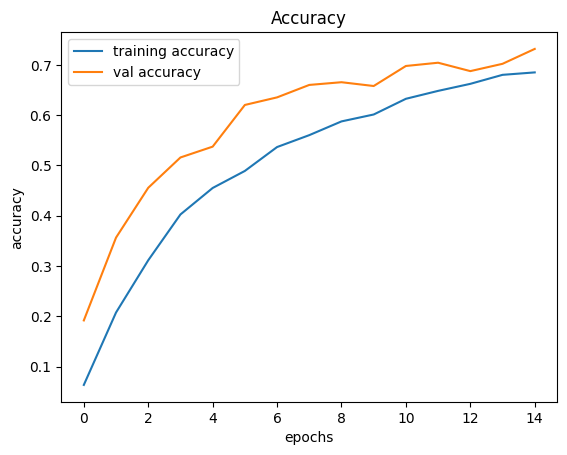

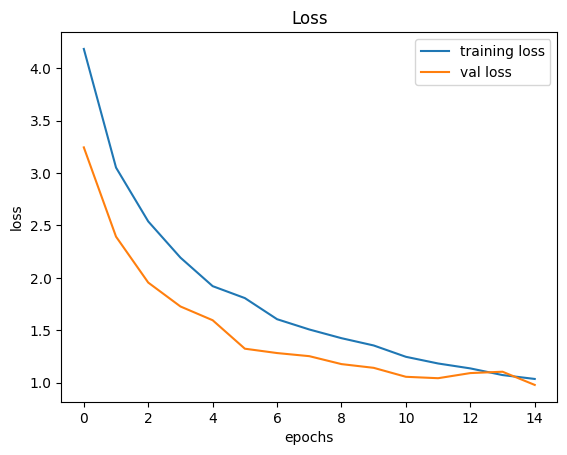

In [289]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [290]:
pred = model.predict(X_test_pred)
predicted_classes = np.argmax(pred, axis=1)

24/24 [==============================] - 5s 204ms/step


In [291]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(Y_test_pred, predicted_classes)*100)

Test Data accuracy:  79.33333333333333
